In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
# number of rows
n=100

In [3]:
# create a tensor with n rows and 2 cols
# all the values in this tensor will be 1s
x = torch.ones(n,2) 
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [4]:
# fill the first col with uniform values b/w -1 and 1
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9363,  1.0000],
        [-0.3646,  1.0000],
        [ 0.6943,  1.0000],
        [ 0.4442,  1.0000],
        [-0.2312,  1.0000]])

In [5]:
# initialize the coefficients
a = tensor(3.,2); a

tensor([3., 2.])

In [6]:
# tensor multiplication and add a little randomness to it
y = x@a + torch.rand(n)

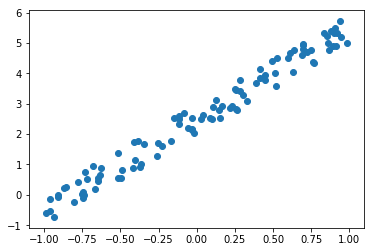

In [7]:
plt.scatter(x[:,0], y);

In [8]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

In [9]:
# now we want to find a1 and a2 i.e tensor a in such a way
# that the line we draw minimizes the error or the loss function
# which in this case is the mse

In [11]:
# let's start with an initial value of -1,1
# note that all numbers need to be floating point
a = tensor(-1.,1)

In [12]:
# we calculate our predictions and mse
y_hat = x@a
mse(y_hat, y)

tensor(8.4964)

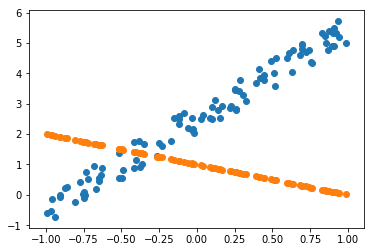

In [14]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0],y_hat);

In [15]:
# the line is horribly wrong

In [16]:
# we have our model (linear regression) and we have
# our evalution metrics i.e mse. Now we need a way
# to optimize that i.e. to find the best line


In [17]:
# this is where gradient descent comes into the picture
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [18]:
# GD implemented in pytorch
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [19]:
lr = 1e-1
for t in range(100): update()

tensor(8.4964, grad_fn=<MeanBackward1>)
tensor(1.3811, grad_fn=<MeanBackward1>)
tensor(0.3842, grad_fn=<MeanBackward1>)
tensor(0.1588, grad_fn=<MeanBackward1>)
tensor(0.1062, grad_fn=<MeanBackward1>)
tensor(0.0940, grad_fn=<MeanBackward1>)
tensor(0.0911, grad_fn=<MeanBackward1>)
tensor(0.0904, grad_fn=<MeanBackward1>)
tensor(0.0903, grad_fn=<MeanBackward1>)
tensor(0.0902, grad_fn=<MeanBackward1>)


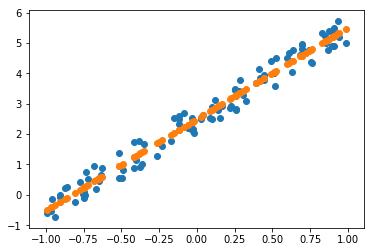

In [20]:
# our error is now down to 0.09
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [23]:
# the values of a1 and a2 as determined by our model
a

Parameter containing:
tensor([3.0153, 2.4955], requires_grad=True)

In [28]:
# what would happen if our learning rate was too high
a = tensor(-1.,1)

In [29]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [30]:
lr = 2
for t in range(100): update()

tensor(8.4964, grad_fn=<MeanBackward1>)
tensor(1.1270e+10, grad_fn=<MeanBackward1>)
tensor(4.1934e+19, grad_fn=<MeanBackward1>)
tensor(1.5602e+29, grad_fn=<MeanBackward1>)
tensor(inf, grad_fn=<MeanBackward1>)
tensor(inf, grad_fn=<MeanBackward1>)
tensor(inf, grad_fn=<MeanBackward1>)
tensor(inf, grad_fn=<MeanBackward1>)
tensor(inf, grad_fn=<MeanBackward1>)
tensor(nan, grad_fn=<MeanBackward1>)


In [31]:
# the model keeps getting worse instead of getting better
# and the error goes so high it is represented as inf

In [32]:
# learning rate too low
a = tensor(-1.,1)
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [35]:
lr = 1e-4
for t in range(100): update()

tensor(8.4767, grad_fn=<MeanBackward1>)
tensor(8.4571, grad_fn=<MeanBackward1>)
tensor(8.4376, grad_fn=<MeanBackward1>)
tensor(8.4181, grad_fn=<MeanBackward1>)
tensor(8.3987, grad_fn=<MeanBackward1>)
tensor(8.3793, grad_fn=<MeanBackward1>)
tensor(8.3600, grad_fn=<MeanBackward1>)
tensor(8.3408, grad_fn=<MeanBackward1>)
tensor(8.3216, grad_fn=<MeanBackward1>)
tensor(8.3024, grad_fn=<MeanBackward1>)


In [36]:
# the error reduces very gradually
# and would need a lot of epochs before learning well